# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

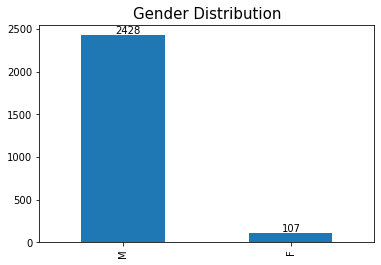

In [5]:
# with pandas

fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
# or
# ax = kill.gender.value_counts().plot(kind='bar')

ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

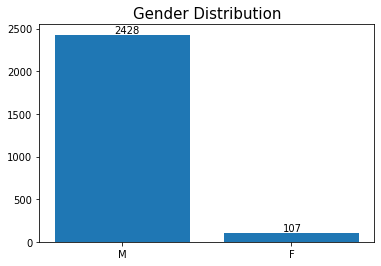

In [6]:
# with matplotlib 
x= kill.gender.value_counts().index
y= kill.gender.value_counts().values

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

In [7]:
ax.patches

In [8]:
ax.patches

In [9]:
ax.patches[1]

In [10]:
ax.patches[1].get_x()

0.6

In [11]:
ax.patches[1].get_height()

107

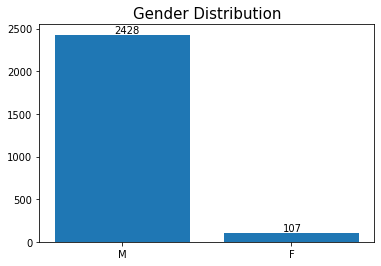

In [12]:
# with matplotlib 
x= kill.gender.value_counts().index
y= kill.gender.value_counts().values

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.text(p.get_x()+0.35, p.get_height()+20 , (p.get_height()) );

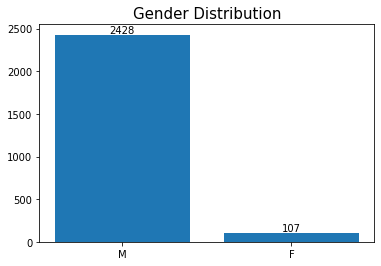

In [13]:
# with matplotlib
x= kill.gender.value_counts().index
y= kill.gender.value_counts().values

plt.bar(x,y)
plt.title("Gender Distribution", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )  #, 

## 2: Plot 7 most common kill weapons

In [14]:
kill.armed.value_counts()[:10]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
machete             18
ax                   9
Taser                9
Name: armed, dtype: int64

In [15]:
kill.armed.value_counts(dropna=False)[:7]

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [16]:
common_weapons = kill.armed.value_counts(dropna=False)[:7]
common_weapons

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

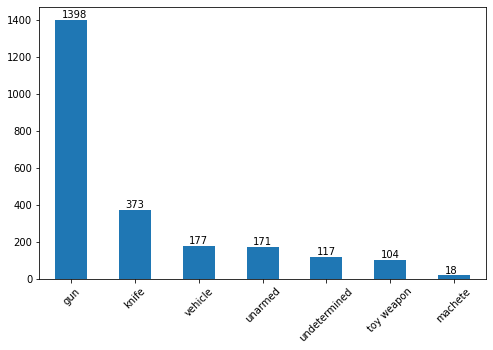

In [17]:
# with pandas
fig, ax = plt.subplots(figsize=(8,5))
common_weapons.plot(kind='bar',ax=ax)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

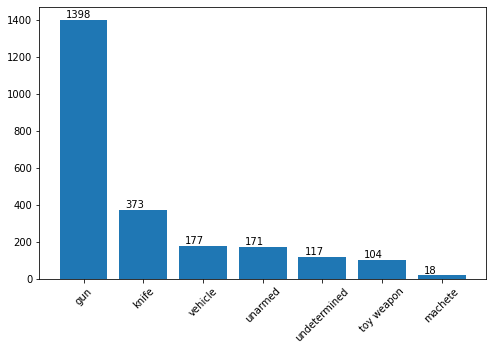

In [18]:
# with matplotlib
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x = common_weapons.index, height=common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [19]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [20]:
kill["age_cat"]=kill.age.apply(lambda x : "above25" if x >25 else "below25")

In [21]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [22]:
age_class = kill.age_cat.value_counts()
age_class

above25    1905
below25     630
Name: age_cat, dtype: int64

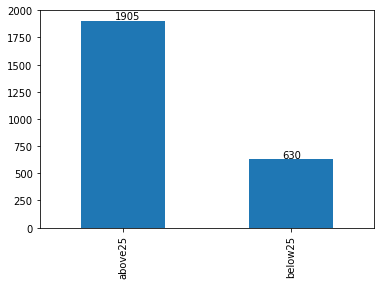

In [23]:
# with pandas
ax = age_class.plot.bar()

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.2, p.get_height()+10));

2535

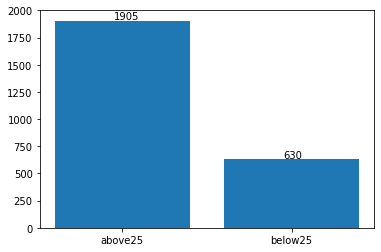

In [24]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x = age_class.index, height= age_class.values)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+10));
age_class.values.sum()

## 4: Plot number of killed poeple by race

In [25]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

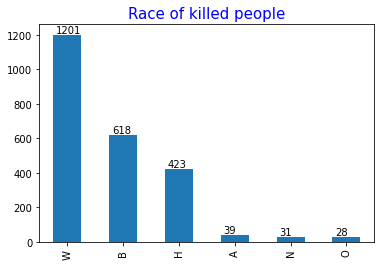

In [26]:
# with pandas
ax = race_freq.plot.bar()
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10));

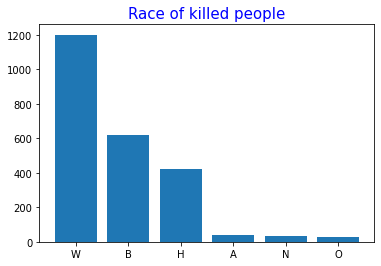

In [27]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x=race_freq.index, height=race_freq.values)
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

## 5: Killed People According to Races (Pie Chart)

In [28]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [29]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [30]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [31]:
kill.race.dropna(inplace=True)

In [32]:
kill.shape

(2535, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [33]:
kill.race.value_counts(dropna=False)

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [34]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [35]:
sizes=kill.race.value_counts().values
sizes

array([1201,  618,  423,   39,   31,   28], dtype=int64)

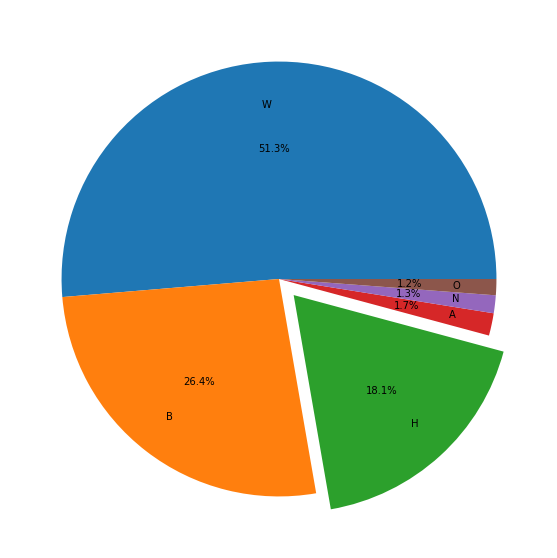

In [36]:
explode = (0, 0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(x = sizes, 
        explode=explode, 
        labels=labels, 
        labeldistance=0.8,
        autopct='%.1f%%',

#         shadow=True, 
        startangle=0,
#         radius=1.5,
       );

## 6: Most common 15 Name or Surname of killed people 

In [37]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [38]:
kill.shape

(2535, 15)

In [39]:
kill.name.value_counts()

TK TK                       49
Daquan Antonio Westbrook     2
Brandon Jones                2
Michael Brown                2
Michael Johnson              2
                            ..
Peter J. Doffin              1
Erick Rose                   1
John Leonard Berry           1
William A. Young             1
Frederick H. Hall            1
Name: name, Length: 2481, dtype: int64

In [40]:
kill[kill.name == 'TK TK']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
928,1074,TK TK,10/12/15,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False,below25
1397,1584,TK TK,01/06/16,shot,gun,NaN,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False,below25
1419,1615,TK TK,09/06/16,shot,baton,NaN,M,NaN,Somerton,AZ,False,attack,Not fleeing,False,below25
1500,1685,TK TK,04/07/16,shot,knife,NaN,M,NaN,Rosser,TX,False,other,Not fleeing,True,below25
1646,1848,TK TK,01/09/16,shot and Tasered,pipe,NaN,M,H,Huntington Park,CA,False,other,Not fleeing,False,below25
1825,2037,TK TK,11/11/16,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False,below25
1894,2110,TK TK,08/12/16,shot,gun,NaN,M,NaN,Allen,TX,False,attack,Not fleeing,False,below25
1921,2141,TK TK,20/12/16,shot,knife,NaN,M,NaN,Brawley,CA,True,other,Not fleeing,False,below25
1927,2154,TK TK,21/12/16,shot,knife,NaN,M,NaN,Stockton,CA,False,undetermined,Not fleeing,False,below25
1933,2168,TK TK,23/12/16,shot,vehicle,NaN,M,NaN,El Monte,CA,False,other,Car,False,below25


In [41]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [42]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

In [43]:
pairs.shape

(2486,)

In [44]:
pairs[0]

['Tim', 'Elliot']

In [45]:
pairs[0][0]

'Tim'

In [46]:
table=[]
for i in pairs:
    for j in i:
        table.append(j)

In [47]:
len(table)

5904

In [48]:
table2=[]
for i in pairs:
    table2.append(i[-1])
len(table2)

2486

In [49]:
name= {}
for i in table2:
    if i in name:
        name[i] += 1
    else:
        name[i] = 1
name

{'Elliot': 1,
 'Lembke': 1,
 'Quintero': 2,
 'Hoffman': 2,
 'Rodriguez': 12,
 'Brown': 15,
 'Buck': 3,
 'Nichols': 3,
 'Steele': 2,
 'III': 9,
 'Wetter': 1,
 'Sneed': 1,
 'Abdul-Rasheed': 1,
 'Brickman': 1,
 'Jackson': 10,
 'Simpson': 4,
 'Barker': 2,
 'Howard': 2,
 'Hamby': 1,
 'Foreman': 2,
 'Martinez': 9,
 'Smith': 36,
 'Barbosa': 1,
 'Figueroa': 2,
 "O'Keefe": 1,
 'McClendon': 2,
 'Golden': 1,
 'Goebel': 1,
 'Jordan': 1,
 'Schroeder': 2,
 'Edwards': 6,
 'Nielson': 1,
 'Sowell': 2,
 'Payton': 1,
 'Reindl': 1,
 'Ceja': 1,
 'Massey': 1,
 'Hall': 13,
 'Shinwary': 1,
 'Walker': 3,
 'Meza': 1,
 'Brumley': 1,
 'Guillory': 2,
 'Castle': 1,
 'Campbell': 5,
 'Carr': 1,
 'Hodge': 4,
 'Santos-Rodriguez': 1,
 'Holmes': 3,
 'Toto': 1,
 'Meton': 1,
 'Coignard': 1,
 'Mesch': 1,
 'Turner': 4,
 'Ruiz': 2,
 'King': 6,
 'Myler': 1,
 'Hutchins': 1,
 'Lopez': 6,
 'Hernandez': 13,
 'Kmetz': 1,
 'Garcia': 11,
 'Tewa': 1,
 'Ingram': 1,
 'Fletcher': 3,
 'Terry': 2,
 'Alverson': 1,
 'Nuu': 1,
 'Karasek': 1,


In [50]:
sorted(name.items(), key=lambda x: x[1], reverse=True)[:10]

[('Smith', 36),
 ('Johnson', 32),
 ('Jr.', 20),
 ('Williams', 18),
 ('Brown', 15),
 ('Anderson', 15),
 ('Jones', 14),
 ('Hall', 13),
 ('Hernandez', 13),
 ('Davis', 13)]

In [51]:
from collections import Counter
most_common_names=Counter(table)
most_common_names

Counter({'Tim': 3,
         'Elliot': 1,
         'Lewis': 7,
         'Lee': 38,
         'Lembke': 1,
         'John': 42,
         'Paul': 19,
         'Quintero': 2,
         'Matthew': 24,
         'Hoffman': 2,
         'Michael': 91,
         'Rodriguez': 13,
         'Kenneth': 19,
         'Joe': 9,
         'Brown': 18,
         'Arnold': 2,
         'Buck': 3,
         'Brock': 2,
         'Nichols': 3,
         'Autumn': 1,
         'Steele': 2,
         'Leslie': 3,
         'Sapp': 2,
         'III': 9,
         'Patrick': 15,
         'Wetter': 1,
         'Ron': 2,
         'Sneed': 1,
         'Hashim': 1,
         'Hanif': 1,
         'Ibn': 1,
         'Abdul-Rasheed': 1,
         'Nicholas': 13,
         'Ryan': 17,
         'Brickman': 1,
         'Omarr': 1,
         'Julian': 3,
         'Maximillian': 1,
         'Jackson': 10,
         'Loren': 3,
         'Simpson': 4,
         'James': 57,
         'Dudley': 1,
         'Barker': 2,
         'Artago': 1,
    

In [52]:
type(most_common_names)

collections.Counter

In [53]:
most_common_names = most_common_names.most_common(15)
most_common_names

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [54]:
df = pd.DataFrame(list(most_common_names), columns=["name_or_surname_most_frequency", "frequency"])
df

,name_or_surname_most_frequency,frequency
0,Michael,91
1,James,57
2,David,57
3,Robert,48
4,Joseph,48
5,William,47
6,Daniel,46
7,John,42
8,Christopher,40
9,Lee,38


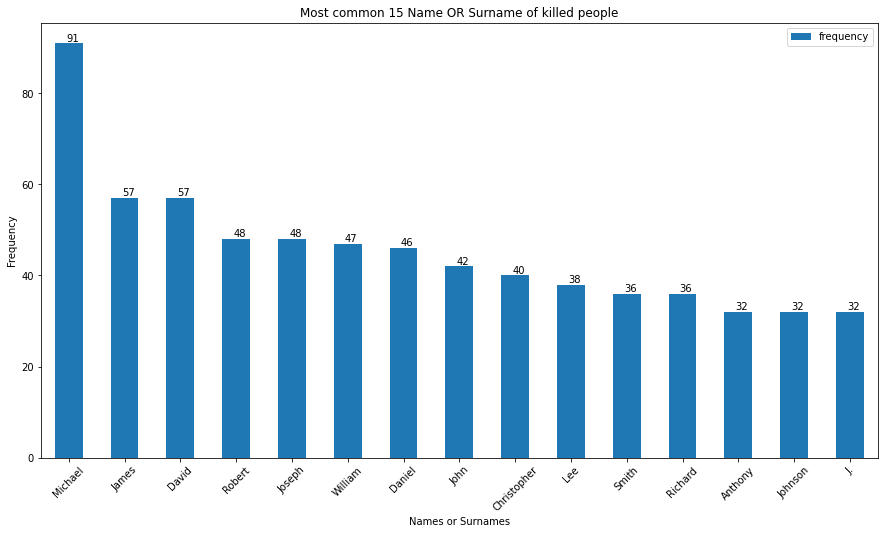

In [55]:
# with pandas
fig, ax = plt.subplots(figsize=(15,8))
df.plot(rot=45, kind='bar', ax=ax)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")
ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

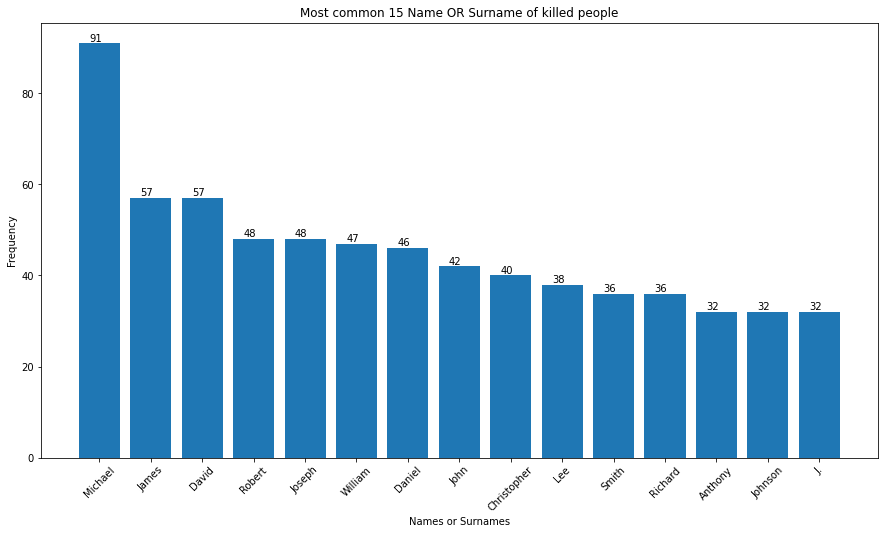

In [56]:
# with matplotlib
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=df.name_or_surname_most_frequency, height=df.frequency)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")
ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

In [57]:
#alterbnative solition

In [58]:
table2=[]
for i in pairs:
    table2.append(i[-1])
len(table2)

2486

In [59]:
name= {}
for i in table2:
    if i in name:
        name[i] += 1
    else:
        name[i] = 1
len(name)

1721

In [60]:
sorted(name.items(), key=lambda x: x[1], reverse=True)[:10]

[('Smith', 36),
 ('Johnson', 32),
 ('Jr.', 20),
 ('Williams', 18),
 ('Brown', 15),
 ('Anderson', 15),
 ('Jones', 14),
 ('Hall', 13),
 ('Hernandez', 13),
 ('Davis', 13)]

In [61]:
df_name = pd.DataFrame(sorted(name.items(), key=lambda x: x[1], reverse=True)[:10],columns=["name","val"])
df_name

,name,val
0,Smith,36
1,Johnson,32
2,Jr.,20
3,Williams,18
4,Brown,15
5,Anderson,15
6,Jones,14
7,Hall,13
8,Hernandez,13
9,Davis,13


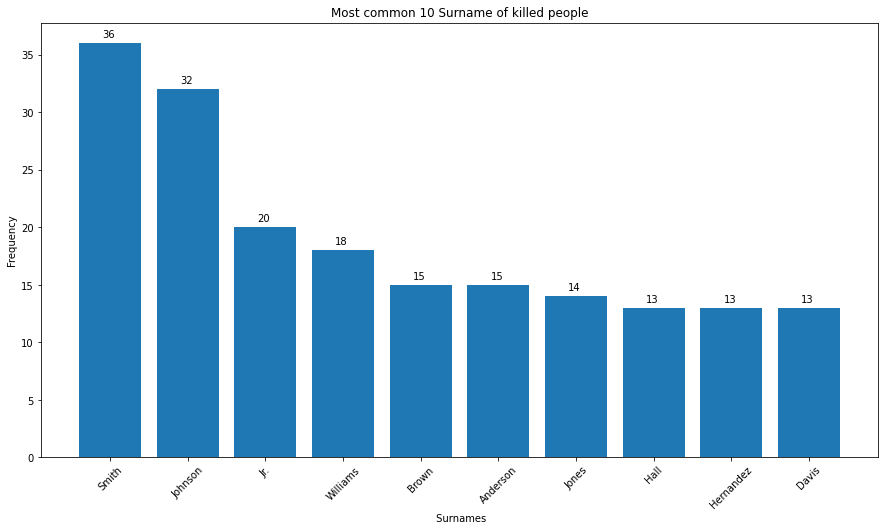

In [62]:
# with matplotlib
x=df_name.name
y=df_name.val

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=x, height=y)

ax.set_ylabel("Frequency")
ax.set_xlabel(" Surnames")
ax.set_title("Most common 10 Surname of killed people")
ax.set_xticklabels(x, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.5));

In [66]:
kill.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
age_cat                      0
dtype: int64